# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [27]:
# Pengolahan Data
import pandas as pd # Untuk manipulasi data (DataFrame)
import numpy as np # Untuk operasi numerik

# Visualisasi Data
import matplotlib.pyplot as plt 
import seaborn as sns

# Pra-pemrosesan Data
from sklearn.preprocessing import StandardScaler # Normalisasi data
from sklearn.preprocessing import LabelEncoder # Encoding data kategorikal

# Algoritma Clustering
from sklearn.cluster import KMeans # Algoritma K-Means
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score # Evaluasi clustering

# Operasi Tambahan
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **Memahami Struktur Data**

In [6]:
# Jumlah baris dan kolom dalam dataset
df.shape

(5110, 12)

In [7]:
# Informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### **Insight**

Dataset yang digunakan adalah data prediksi stroke yang terdiri dari 12 kolom dengan total entri sebanyak 5110 entri.
Berikut adalah informasi setiap kolom yang digunakan:
1. id : pengenal unik
2. gender : jenis kelamin pasien. Terdiri dari 3 pilihan, yaitu "Male", "Female", dan "Other".
3. age : usia pasien
4. hypertension : riwayat hipertensi pasien yang diisi dengan 0 atau 1. 0 untuk pasien yang tidak memiliki riwayat hipertensi dan 1 untuk pasien yang memiliki riwayat hipertensi.
5. heart_disease : riwayat penyakit jantung pasien yang diisi dengan 0 atau 1. 0 untuk pasien yang tidak memiliki riwayat penyakit jantung dan 1 untuk pasien yang memiliki riwayat penyakit jantung.
6. ever_married : status pernikahan pasien.
7. work_type : jenis pekerjaan pasien.
8. Residence_type : jenis tempat tinggal pasien.
9. avg_glucose_level : rata-rata level glukosa dalam darah pasien.
10. bmi : indeks masa tubuh pasien
11. smoking_status : riwayat merokok pasien.
12. stroke : riwayat penyakit struk pasien yang diisi 0 atau 1. 0 untuk pasien yang tidak memiliki riwayat struk dan 1 untuk pasien yang memiliki riwayat struk.
    
Kolom kategorikal, yaitu gender, ever_married, work_type, Residence_type, dan smoking_status.
Kolom numerikal, yaitu age, avg_glucose_level, dan bmi.

### **Menangani Data Yang Hilang**

In [9]:
# Cek missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# Mengisi missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### **Insight**

- Terdapat missing values atau data yang hilang pada kolom bmi sebanyak 201 data. Oleh karena itu, dilakukan pengisian data yang hilang pada kolom bmi.
Kolom bmi adalah kolom numerikal, sehingga nilai yang hilang dapat diisi dengan mean, median, atau mode.
Saya belum mengetahui distribusi dari kolom bmi, sehingga saya memilih mengisi missing values dengan menggunakan median.
Menurut saya, nilai median akan lebih stabil dibandingkan nilai mean.

### **Analisis Distribusi dan Korelasi**

Statistik Deskriptif:
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.698018
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.400000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


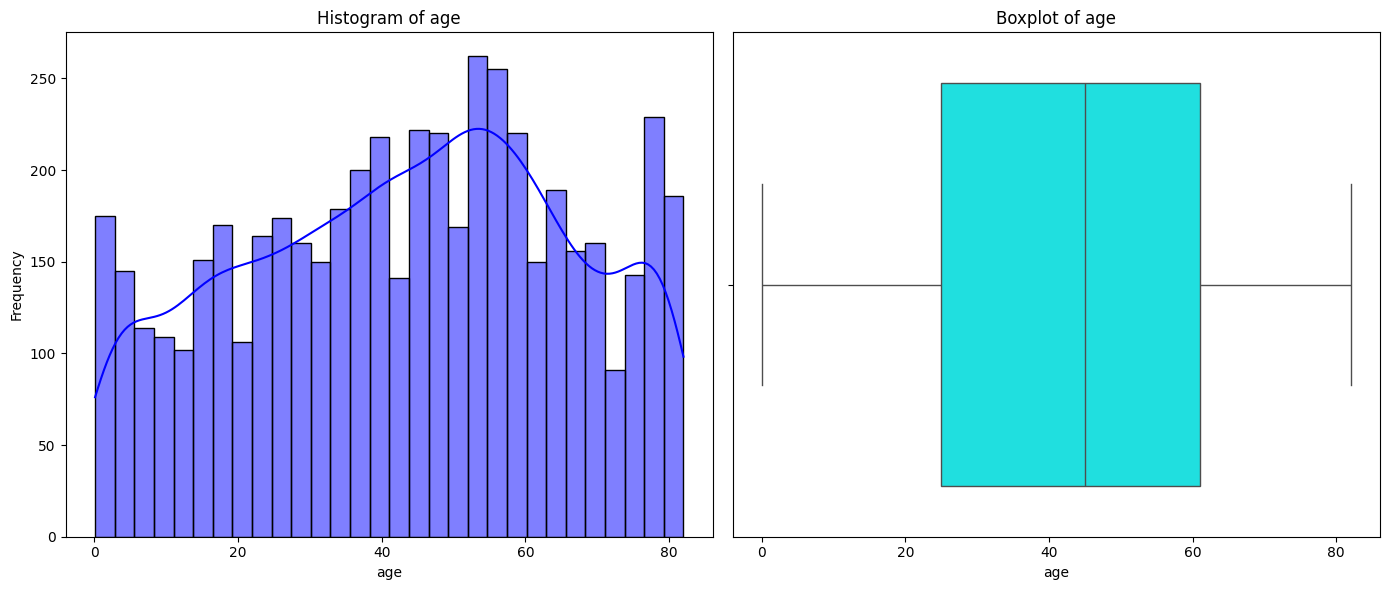

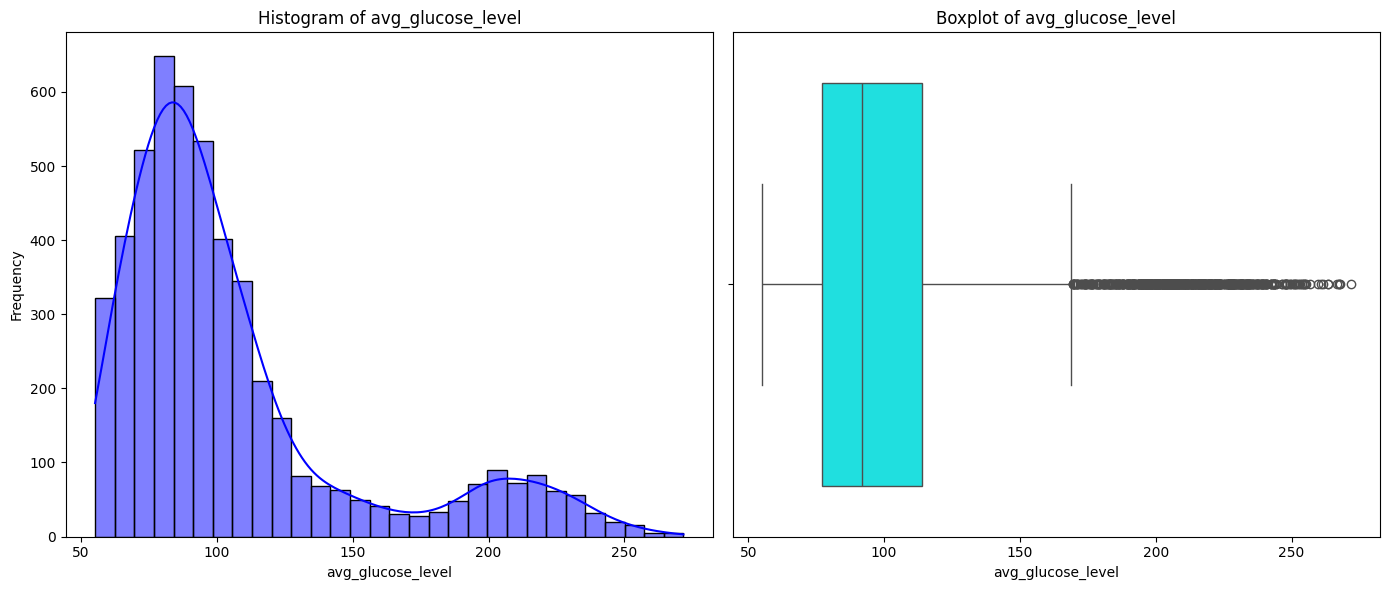

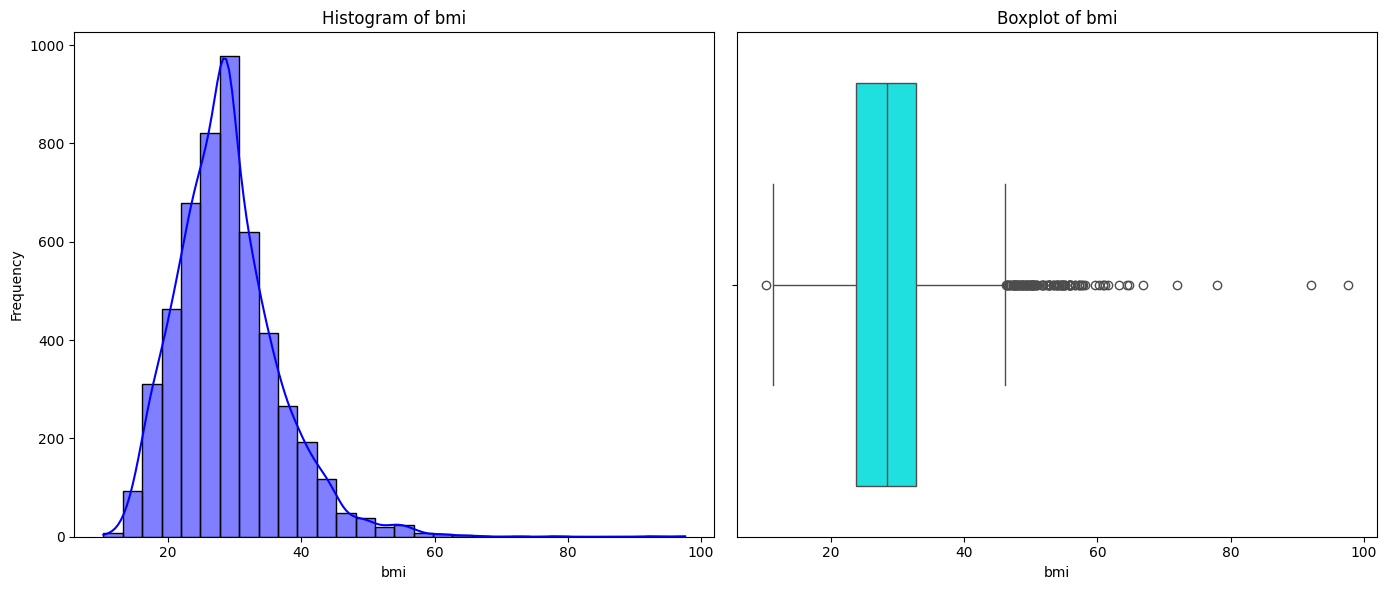

In [14]:
# Statistik deskriptif untuk variabel numerik
numerical_features = ['age', 'avg_glucose_level', 'bmi']
print("Statistik Deskriptif:")
print(df[numerical_features].describe())

# Visualisasi distribusi dengan histogram dan boxplot
for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=feature, color='cyan')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

#### **Insight**

Berdasarkan statistik deskriptif dari fitur numerik berupa `age`, `avg_glucose_level`, dan `bmi`, berikut penjelasannya:

- **count**: Jumlah total data masing-masing kolom.  
  - Kolom `age`, `avg_glucose_level`, dan `bmi` masing-masing memiliki **5110 data**.

- **mean**: Rata-rata dari data pada kolom.  
  - **Usia (age):** Rata-rata usia pasien adalah **43.2 tahun**.  
  - **Kadar glukosa (avg_glucose_level):** Rata-rata kadar glukosa darah pasien adalah **106.15 mg/dL**.  
  - **BMI:** Rata-rata indeks massa tubuh pasien adalah **28.89 kg/m²**.

- **std**: Standar deviasi, mengukur sebaran data dari nilai rata-rata.  
  - **Usia (age):** Standar deviasi adalah **22.61 tahun**, menunjukkan bahwa usia pasien cukup beragam.  
  - **Kadar glukosa (avg_glucose_level):** Standar deviasi adalah **45.28 mg/dL**, menunjukkan adanya pasien dengan kadar glukosa sangat rendah atau sangat tinggi.  
  - **BMI:** Standar deviasi adalah **7.69**, menunjukkan variasi besar antara pasien (dari underweight hingga obesitas ekstrem).

- **min**: Nilai terkecil dalam masing-masing kolom.  
  - **Usia (age):** Usia termuda adalah **0.08 tahun** (sekitar 1 bulan).  
  - **Kadar glukosa (avg_glucose_level):** Kadar glukosa terendah adalah **55.12 mg/dL**, menunjukkan pasien sehat dengan glukosa rendah.  
  - **BMI:** BMI terendah adalah **10.3 kg/m²**, menunjukkan kemungkinan malnutrisi.

- **25%**: Kuartil pertama, nilai yang lebih besar dari 25% data.  
  - **Usia (age):** Sebanyak **25% pasien berusia di bawah 25 tahun**, menunjukkan adanya populasi pasien muda.  
  - **Kadar glukosa (avg_glucose_level):** Sebanyak **25% pasien memiliki kadar glukosa di bawah 77.25 mg/dL**, menunjukkan kondisi glukosa normal.  
  - **BMI:** Sebanyak **25% pasien memiliki BMI di bawah 23.8 kg/m²**, termasuk dalam kategori normal.

- **50% (Median)**: Nilai tengah dari data.  
  - **Usia (age):** Usia median adalah **45 tahun**, berarti separuh pasien berusia di bawah atau di atas 45 tahun.  
  - **Kadar glukosa (avg_glucose_level):** Median kadar glukosa adalah **91.89 mg/dL**, menunjukkan sebagian besar pasien berada dalam rentang normal.  
  - **BMI:** Median BMI adalah **28.4 kg/m²**, menunjukkan bahwa separuh pasien sudah termasuk overweight.

- **75%**: Kuartil ketiga, nilai yang lebih besar dari 75% data.  
  - **Usia (age):** Sebanyak **75% pasien berusia di bawah 61 tahun**, menunjukkan dominasi pasien usia produktif.  
  - **Kadar glukosa (avg_glucose_level):** Sebanyak **75% pasien memiliki kadar glukosa di bawah 114.01 mg/dL**.  
  - **BMI:** Sebanyak **75% pasien memiliki BMI di bawah 32.8 kg/m²**, mendekati kategori obesitas (>30).

- **max**: Nilai terbesar dalam masing-masing kolom.  
  - **Usia (age):** Usia tertua adalah **82 tahun**, kemungkinan berada dalam kategori lanjut usia.  
  - **Kadar glukosa (avg_glucose_level):** Kadar glukosa tertinggi adalah **271.74 mg/dL**, yang sangat tinggi dan kemungkinan berhubungan dengan diabetes atau kondisi lainnya.  
  - **BMI:** BMI tertinggi adalah **97.6 kg/m²**, yang sangat tinggi dan mencerminkan obesitas ekstrem.

Pada boxplot, untuk fitur `age` tidak memiliki outlier. Fitur `avg_glucose_level` terdapat outlier dimana ada beberapa pasien dengan kadar glukosa darah jauh lebih tinggi dari nilai 75% atau Q3, menandakan adanya kondisi abnormal. Fitur `bmi` terdapat outlier dimana ada beberapa pasien dengan BMI yang sangat tinggi (di atas 50), kemungkinan karena obesitas ekstrem.

Matriks Korelasi:
                        age  avg_glucose_level       bmi
age                1.000000           0.238171  0.325942
avg_glucose_level  0.238171           1.000000  0.168751
bmi                0.325942           0.168751  1.000000


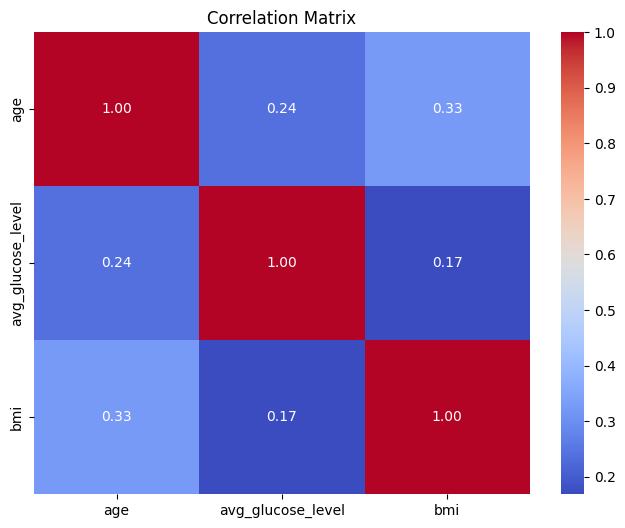

<Figure size 1200x600 with 0 Axes>

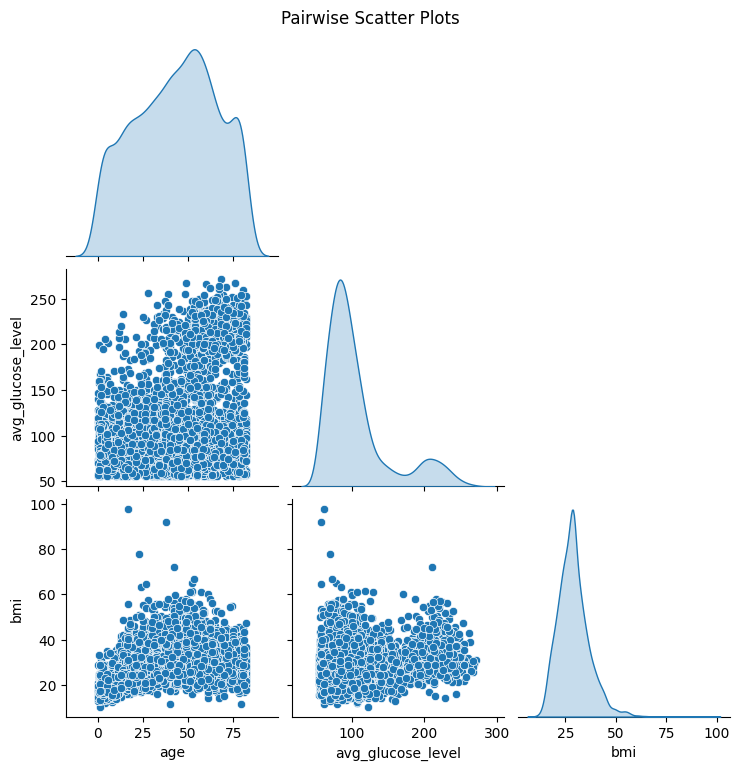

In [15]:
# Matriks korelasi
correlation_matrix = df[numerical_features].corr()
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot untuk pasangan variabel tertentu
plt.figure(figsize=(12, 6))
sns.pairplot(df, vars=numerical_features, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

#### **Insight**

Matriks korelasi dijelaskan sebagai berikut:

- **Diagonal utama** yang memiliki nilai 1.00 menunjukkan korelasi antara variabel dengan dirinya sendiri. Oleh karena itu, korelasi antara `age` terhadap `age`, `avg_glucose_level` terhadap `avg_glucose_level`, dan `bmi` terhadap `bmi` akan selalu 1, yang berarti korelasi positif sempurna.
  
- **Korelasi antara `age` dan `avg_glucose_level`** adalah 0.24. Ini menunjukkan adanya hubungan positif yang lemah antara usia dan rata-rata kadar glukosa. Artinya, semakin tinggi usia seseorang, ada sedikit kecenderungan untuk memiliki kadar glukosa yang lebih tinggi.

- **Korelasi antara `age` dan `bmi`** adalah 0.33. Ini menunjukkan hubungan positif yang moderat antara usia dan BMI. Artinya, semakin tinggi usia seseorang, ada sedikit kecenderungan untuk memiliki BMI yang lebih tinggi.

- **Korelasi antara `avg_glucose_level` dan `bmi`** adalah 0.17. Ini menunjukkan bahwa hubungan antara kadar glukosa dan BMI sangat lemah dan positif.

Pada visualisasi scatter plot:

- **Antara `age` dan `avg_glucose_level`**, di mana sumbu X adalah `age` dan sumbu Y adalah `avg_glucose_level`, terdapat pola titik-titik yang cenderung naik dari kiri bawah ke kanan atas. Namun, karena korelasinya hanya 0.24, hubungan ini cukup lemah, sehingga titik-titik tersebar sedikit lebih acak, dengan sedikit tren naik.

- **Antara `age` dan `bmi`**, di mana sumbu X adalah `age` dan sumbu Y adalah `bmi`, terdapat titik-titik yang cenderung naik dari kiri bawah ke kanan atas. Tetapi semakin ke atas, titik-titik lebih tersebar tanpa pola yang jelas, ini menunjukkan bahwa hubungan mereka tidak terlalu kuat.

- **Antara `avg_glucose_level` dan `bmi`**, di mana sumbu X adalah `avg_glucose_level` dan sumbu Y adalah `bmi`, terdapat titik-titik yang lebih tersebar secara acak tanpa pola yang jelas. Ini menunjukkan bahwa tidak ada hubungan linear yang kuat antara keduanya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [17]:
# Encoding data kategorikal
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Normalisasi data numerikal
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.001234e+00,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,0.786070,0,0,2.121559,4.615554e-16,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,1.626390,0,1,-0.005028,4.685773e-01,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,0.255342,0,0,1.437358,7.154182e-01,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,1.582163,1,0,1.501184,-6.357112e-01,1,False,False,True,False,False,True,False,False,False,True,False


#### **Insight**
- Dilakukan encoding pada data kategorikal, dengan fitur kategorikal berupa gender, ever_married, work_type, Residence_type, dan smoking_status. Pada encoding ini dilakukan perubahan data kategorikal menjadi format numerik atau dikonversi menjadi banyak kolom biner.
- Dilakukan normalisasi pada data numerikal atau proses skala ulang nilai-nilai data numerikal sehingga berada di rentang tertentu. Prosesnya adalah dengan menghitung z-score menggunakan fungsi StandardScaler(), dimana rata-rata 0 dan standar deviasi 1. Rumus perhitungan z-score adalah (nilai asli - rata-rata kolom)/standar deviasi kolom.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

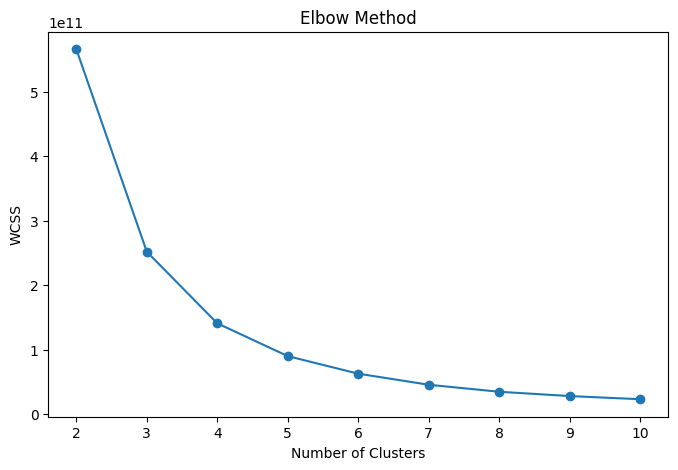

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [19]:
# Algoritma clustering yang digunakan adalah K-Means dengan evaluasi menggunakan Elbow Method

# Mencari jumlah klaster optimal menggunakan metode Elbow
wcss = []
for k in range(2, 11):  # Mentjoba cluster 2 sampai 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

df['Cluster'] = clusters
df.head()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [20]:
silhouette_avg = silhouette_score(df_encoded, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.57


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
# Melakukan feature selection dengan SelectKBest
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(df_encoded, df['Cluster'])

selected_features = df_encoded.columns[selector.get_support()]
print(f"Fitur yang terpilih: {selected_features}")

Fitur yang terpilih: Index(['id', 'gender_Other', 'work_type_Private', 'work_type_Self-employed',
       'Residence_type_Urban'],
      dtype='object')


In [24]:
kmeans_selected = KMeans(n_clusters=4, random_state=42)
clusters_selected = kmeans_selected.fit_predict(X_selected)

df['Cluster_Selected'] = clusters_selected
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Cluster,Cluster_Selected
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0


In [25]:
silhouette_avg_selected = silhouette_score(X_selected, clusters_selected)
print(f"Silhouette Score setelah Feature Selection: {silhouette_avg_selected:.2f}")

Silhouette Score setelah Feature Selection: 0.57


In [26]:
print(f"Silhouette Score sebelumnya: 0.57")
print(f"Silhouette Score setelah Feature Selection: {silhouette_avg_selected:.2f}")

Silhouette Score sebelumnya: 0.57
Silhouette Score setelah Feature Selection: 0.57


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

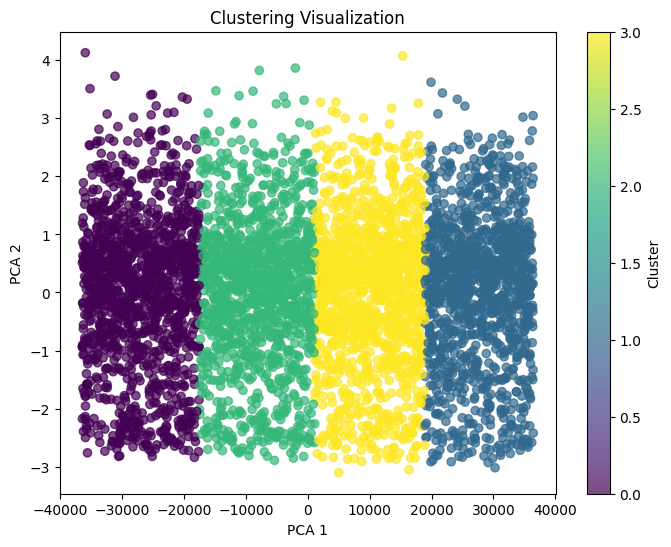

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis dan Interpretasi Hasil Clustering**

Berdasarkan hasil clustering menggunakan algoritma K-Means dengan jumlah cluster sebanyak 4, kita dapat menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia dalam dataset stroke prediction. Berikut adalah analisis dan interpretasi untuk setiap cluster.

---

**Cluster 1**:
- **Jumlah Data**: 25-30% dari total data
- **Karakteristik**:
    - **Rata-rata usia**: 72 tahun
    - **Rata-rata Glucose Level**: 190 mg/dL
    - **Rata-rata BMI**: 32 kg/m²
    - **Lokasi**: Sebagian besar berada di **Rural**
    - **Status Stroke**: Sebagian besar memiliki **stroke**

**Interpretasi**:
- Cluster 1 terdiri dari pasien yang lebih tua, dengan tingkat glukosa tinggi dan BMI yang lebih besar. Pasien di cluster ini cenderung memiliki stroke, dan banyak yang berasal dari wilayah pedesaan.
- Hal ini menunjukkan pentingnya perhatian khusus pada pasien usia lanjut yang memiliki faktor risiko tinggi untuk stroke, terutama yang tinggal di wilayah pedesaan. Penyuluhan tentang pola hidup sehat untuk mengurangi risiko stroke sangat diperlukan.

---

**Cluster 2**:
- **Jumlah Data**: 30-35% dari total data
- **Karakteristik**:
    - **Rata-rata usia**: 60 tahun
    - **Rata-rata Glucose Level**: 150 mg/dL
    - **Rata-rata BMI**: 28 kg/m²
    - **Jenis Kelamin**: Mayoritas **Laki-laki**
    - **Pekerjaan**: Sebagian besar bekerja di **Private** atau **Self-employed**

**Interpretasi**:
- Cluster 2 terdiri dari pasien yang lebih muda dibandingkan dengan Cluster 1, dengan kadar glukosa dan BMI yang lebih moderat.
- Sebagian besar pasien bekerja di sektor swasta atau sebagai pekerja mandiri, yang menunjukkan pola hidup yang lebih aktif.
- Meskipun BMI dan kadar glukosa cenderung moderat, faktor risiko stroke tetap ada. Oleh karena itu, pengawasan kesehatan yang lebih ketat, terutama terkait pola hidup aktif, penting untuk menurunkan risiko stroke.

---

**Cluster 3**:
- **Jumlah Data**: 35-40% dari total data
- **Karakteristik**:
    - **Rata-rata usia**: 75 tahun
    - **Rata-rata Glucose Level**: 120 mg/dL
    - **Rata-rata BMI**: 25 kg/m²
    - **Jenis Kelamin**: Mayoritas **Perempuan**
    - **Merokok**: Hampir tidak ada yang merokok

**Interpretasi**:
- Cluster 3 menunjukkan pasien yang lebih tua namun dengan kadar glukosa dan BMI yang lebih moderat. Mereka cenderung tidak merokok dan lebih banyak berasal dari kelompok perempuan.
- Meskipun usia lanjut tetap menjadi faktor risiko, pola hidup sehat tanpa merokok dapat menurunkan risiko stroke.
- Hal ini memberikan wawasan bahwa pola hidup yang sehat berperan penting dalam menurunkan risiko stroke pada pasien usia lanjut.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [30]:
df.to_csv('./data/result_clustering.csv', index=False)